# Data Analysis: - Ocean Climate & Marine Life
_____


This analysis explores the relationship between ocean climate variables and marine biodiversity across a range of global ocean locations. The dataset spans 9 years and contains information on key ocean climate indicators, such as Sea Surface Temperature (SST), pH level, and the occurrence of marine heatwaves. Additionally, it provides insights into coral bleaching severity and the number of marine species observed at various locations.

The primary aim of this analysis is to understand how changes in ocean conditions—such as rising temperatures and acidification — affect marine biodiversity. Through a series of visualizations, we investigate trends over time, geographical variations, and the potential impact of marine heatwaves and bleaching events on marine species diversity. This analysis is particularly relevant in the context of climate change, which is increasingly influencing ocean health and the biodiversity within. 

____

## Imports

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Pandas and numpty for dataset/array manipulation
import pandas as pd
import numpy as np
import datetime as dt

#Seaborn and Matplotlib for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly for more interactive graphs
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Import the dataset 
df_activity = pd.read_csv("/kaggle/input/shifting-seas-ocean-climate-and-marine-life-dataset/realistic_ocean_climate_dataset.csv")

## Basic Data Exploration

In [3]:
#Return the first 5 rows of the dataset
df_activity.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


Brief Description of the data:
- **Date**: Date of Observation
- **Location**: Marine Location Name
- **Latitude**: Latitude of the Observation Site
- **Longitude**: Longitude of the Observation Site
- **SST**: Sea Surface Temperature in Degrees Celcius
- **pH Level**: Acidity Level of Seawater (lower means more acidic = acidification)
- **Bleaching Severity**: Categorical Variables
- **Species Observed**: Count of marine Species Observed During Sample Period
- **Marine Heatwave**: Indicates whether SST > 30°C

In [4]:
#Information about the dataframe including index dtypes and columns
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (°C)            500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  350 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB


In [5]:
print(df_activity['Location'].unique())
print("------")
print(df_activity['Location'].value_counts())

['Red Sea' 'Great Barrier Reef' 'Caribbean Sea' 'Galápagos'
 'South China Sea' 'Maldives' 'Hawaiian Islands']
------
Location
Great Barrier Reef    87
Red Sea               83
South China Sea       73
Hawaiian Islands      71
Caribbean Sea         70
Galápagos             65
Maldives              51
Name: count, dtype: int64


In [6]:
print(df_activity['Bleaching Severity'].unique())
print("------")
print(df_activity['Bleaching Severity'].value_counts())

[nan 'High' 'Medium' 'Low']
------
Bleaching Severity
Low       132
Medium    130
High       88
Name: count, dtype: int64


The summary above provides us with some key information that will come in use later on:
- There are a total of 500 entries with 9 columns of data across the whole data 
- There are 7 unique locations in the dataset
- 'Bleaching Severity' is the only column with missing or nan values, we can fix this later
- Date is currently an object Dtype, we can fix this later

## Data Cleansing

In [7]:
# Convert the Date column into a DateTime dtype
df_activity['Date'] = pd.to_datetime(df_activity['Date'])

In [8]:
# Extract the year from the Date, we will want to use this later
df_activity['Year'] = df_activity['Date'].dt.year
df_activity.head(3)

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave,Year
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False,2015
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False,2015
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False,2015


In [9]:
# Replace any nan values in the Bleacing Severity column with 'Zero'
df_activity = df_activity.replace(np.nan,'Unknown')
df_activity['Bleaching Severity'].value_counts()

Bleaching Severity
Unknown    150
Low        132
Medium     130
High        88
Name: count, dtype: int64

In [10]:
df_activity.describe()

,Date,Latitude,Longitude,SST (°C),pH Level,Species Observed,Year
count,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2019-07-01 12:02:52.799999744,6.728440,11.930638,28.537200,8.049872,120.472000,2018.998000
min,2015-01-01 00:00:00,-18.383000,-155.717600,23.640000,7.872000,54.000000,2015.000000
25%,2017-04-01 06:00:00,-0.932925,-90.926400,27.530000,8.011000,107.750000,2017.000000
50%,2019-07-01 12:00:00,10.018750,38.520000,28.515000,8.052000,120.000000,2019.000000
75%,2021-09-29 18:00:00,19.891000,114.990975,29.452500,8.085250,133.250000,2021.000000
max,2023-12-31 00:00:00,20.122000,147.827100,33.210000,8.195000,171.000000,2023.000000
std,NaN,13.534648,108.174778,1.425076,0.055707,20.475441,2.589093


Lets breakdown the description of the data in the dataframe

Dataset spans 9 years, across global ocean locations.

🌍 Latitude
- Range: -18.38° to 20.12° — Data is from tropical or equatorial zones.
- mean: ~6.73°, std: ~13.5 — wide geographical spread.

🌍 Longitude
- Range: -155.7° to 147.8° — Global ocean coverage.
- std: ~108 — Global data.

🌡️ SST (°C) — Sea Surface Temperature
- Range: 23.64°C to 33.21°C.
- mean: ~28.54°C, std: ~1.43°C.
- Relatively warm range — makes sense for coral environments.

🧪 pH Level
- Range: 7.872 to 8.195
- mean: ~8.05 — Consistent with ocean surface pH.
- std: ~0.056 — Extremely small, but even slight changes in ocean pH can matter a lot for marine life (acidification concerns).

🐠 Species Observed
- Range: 54 to 171
- mean: ~120 species per observation.
- std: ~20.47 — Suggests some sites are more biodiverse than others.

## Data Visualisation

### Total Species Observed by Bleaching Severity

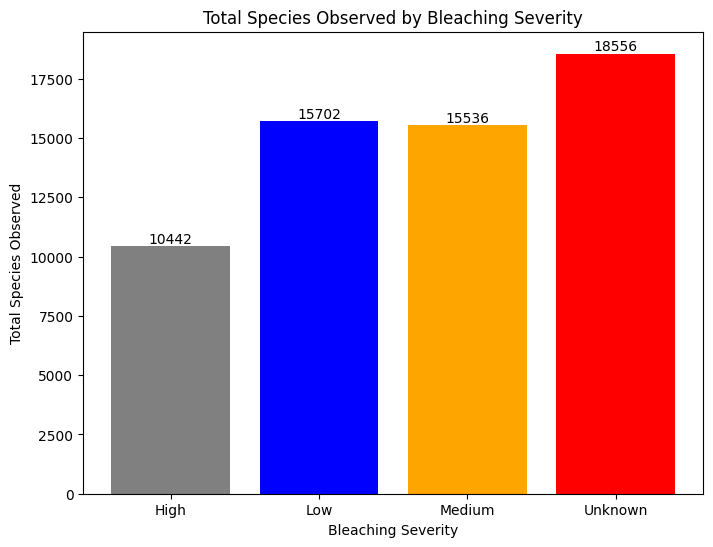

In [11]:
df_severity_species = df_activity.groupby('Bleaching Severity')['Species Observed'].sum().reset_index()

# Define the custom order for the 'Bleaching Severity' category
category_order = ['Unknown', 'Low', 'Medium', 'High']

# Reorder the 'Bleaching Severity' to match the custom order
df_severity_species['Bleaching Severity'] = pd.Categorical(df_severity_species['Bleaching Severity'], categories=category_order, ordered=True)

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(df_severity_species['Bleaching Severity'], df_severity_species['Species Observed'], 
               color=['gray', 'blue', 'orange', 'red'])  # Adjust colors for severity levels

# Add labels and title
plt.xlabel('Bleaching Severity')
plt.ylabel('Total Species Observed')
plt.title('Total Species Observed by Bleaching Severity')

# Display the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

Categories such as 'Unknown', 'Low', 'Medium', and 'High' represent the extent to which coral bleaching has occurred.

The above visualisation helps us understand the relationship between coral bleaching and the biodeversity of marine life in the affected areas. We can see that Low or Medium severity corresponds to higher species numbers, while High severity leads to fewer species, this might suggest that more severe bleaching is harmful to marine biodiversity.

-----

### Average SST

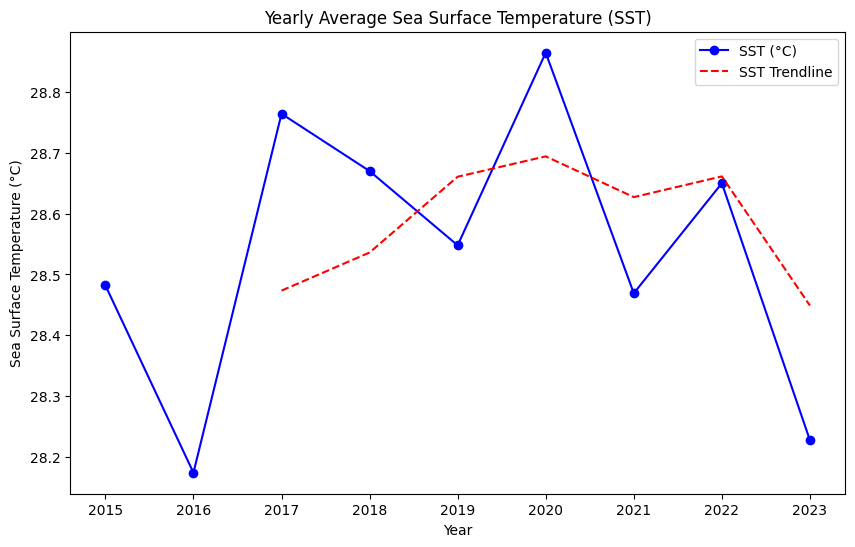

In [12]:
df_yearly = df_activity.groupby(df_activity['Date'].dt.year)[['SST (°C)', 'pH Level']].mean()
df_yearly = df_yearly.reset_index()

# Calculate rolling average (trendline)
df_yearly['SST Trendline'] = df_yearly['SST (°C)'].rolling(window=3).mean()

# Plotting SST (Sea Surface Temperature) with Trendline
plt.figure(figsize=(10, 6))

# Plot SST (Sea Surface Temperature)
plt.plot(df_yearly['Date'], df_yearly['SST (°C)'], marker='o', color='blue', label='SST (°C)')

# Plot Trendline (Rolling Mean)
plt.plot(df_yearly['Date'], df_yearly['SST Trendline'], color='red', linestyle='--', label='SST Trendline')

# Adding labels and title
plt.title('Yearly Average Sea Surface Temperature (SST)')
plt.xlabel('Year')
plt.ylabel('Sea Surface Temperature (°C)')

# Display legend
plt.legend()
plt.show()

The temperature of the ocean surface, which is crucial for understanding climate trends and their impact on marine life, particularly on coral reefs.

This plot highlights trends in ocean warming over time. The moving average smooths out yearly fluctuations and helps us see long-term trends, such as whether SST is rising. An increase in SST could signal a warming climate, which can be harmful to marine ecosystems, especially corals. If SST rises consistently over the years, it could contribute to more frequent and intense marine heatwaves.

----

### Average pH Level

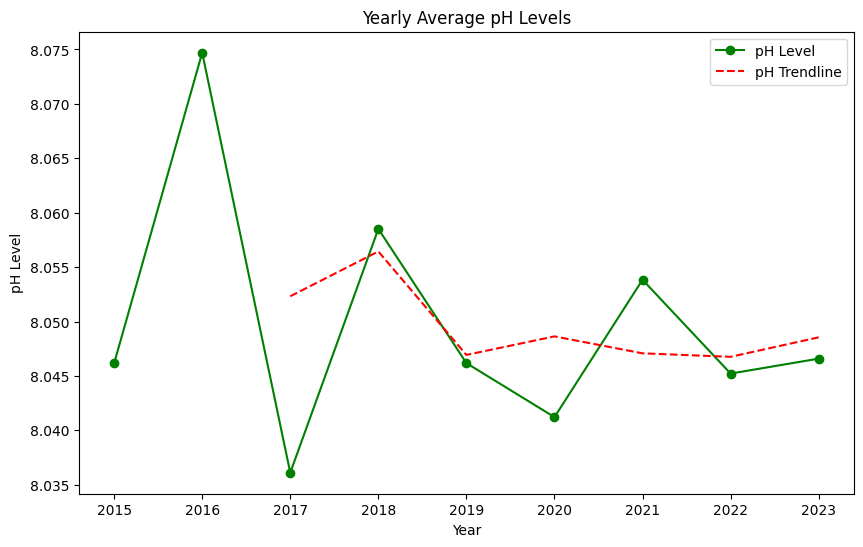

In [13]:
# Calculate rolling average (trendline)
df_yearly['pH Trendline'] = df_yearly['pH Level'].rolling(window=3).mean()

# Plotting pH Level with Trendline
plt.figure(figsize=(10, 6))

# Plot pH Level
plt.plot(df_yearly['Date'], df_yearly['pH Level'], marker='o', color='green', label='pH Level')

# Plot Trendline (Rolling Mean)
plt.plot(df_yearly['Date'], df_yearly['pH Trendline'], color='red', linestyle='--', label='pH Trendline')

# Adding labels and title
plt.title('Yearly Average pH Levels')
plt.xlabel('Year')
plt.ylabel('pH Level')

# Display legend
plt.legend()
plt.show()

The pH level measures the acidity of seawater. A decrease in pH (more acidic water) is a concern for marine life, particularly for calcifying organisms such as corals, shellfish, and plankton.

This visualization helps us monitor ocean acidification. A decrease in pH over time could suggest increased CO₂ absorption by the oceans, which is a key concern in climate change. Ocean acidification can disrupt marine food chains and biodiversity, and tracking changes in pH over time allows us to assess the severity of this issue.

_____

###  SST vs pH Level

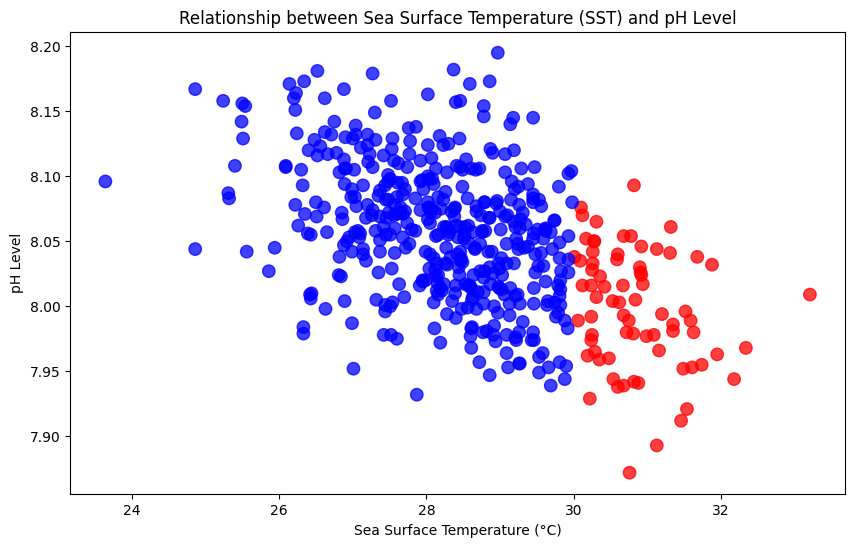

Correlation between SST and pH Level: -0.515


In [14]:
colors = ['red' if sst > 30 else 'blue' for sst in df_activity['SST (°C)']]

# Create scatter plot
plt.figure(figsize=(10, 6))

# Add scatter points
plt.scatter(df_activity['SST (°C)'], df_activity['pH Level'], c=colors, s=80, alpha=0.75)

# Add labels and title
plt.title("Relationship between Sea Surface Temperature (SST) and pH Level")
plt.xlabel("Sea Surface Temperature (°C)")
plt.ylabel("pH Level")

plt.show()

# Calculate and print the correlation
correlation = df_activity['SST (°C)'].corr(df_activity['pH Level'])
print(f"Correlation between SST and pH Level: {correlation:.3f}")

We see a corellation of -0.515, which indicates a moderate negative. in this case an increase in SST equals to a decrease in pH Level. higher SST often correlates with increased acidification. Warmer waters can lead to a lower pH (more acidic), which impacts marine organisms. For example, corals, which are sensitive to both heat and acidification, can suffer bleaching or death under these conditions.

Points are color-coded to distinguish between marine heatwaves (where SST is above 30°C) and non-heatwave conditions. Red represents heatwaves, and blue represents normal conditions.

____

###  Geographical Distribution of SST, pH, and Species Observed

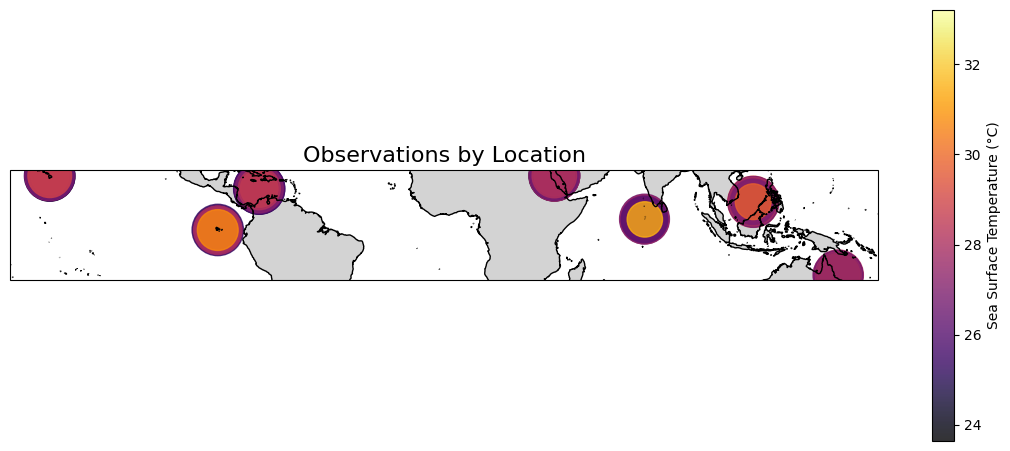

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up figure
fig = plt.figure(figsize=(14, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add basic land and coastlines
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.COASTLINE)

# Scatter plot
scatter = ax.scatter(
    df_activity['Longitude'], 
    df_activity['Latitude'],
    c=df_activity['SST (°C)'],
    cmap='inferno',
    s=df_activity['Species Observed']*8,
    alpha=0.8,
    transform=ccrs.PlateCarree()
)

# Add colorbar
cbar = plt.colorbar(scatter, orientation='vertical', shrink=0.7, pad=0.05)
cbar.set_label('Sea Surface Temperature (°C)')

# Title
plt.title('Observations by Location', fontsize=16)


# Show plot
plt.show()

This visualization helps us see where marine heatwaves or warmer waters coincide with richer biodiversity or areas of coral bleaching. 

We can identify regions where SST is high, which may indicate stress for marine ecosystems, and see how this correlates with biodiversity (e.g., more species might be observed in cooler, more stable waters).

____

### Species Observed vs. SST

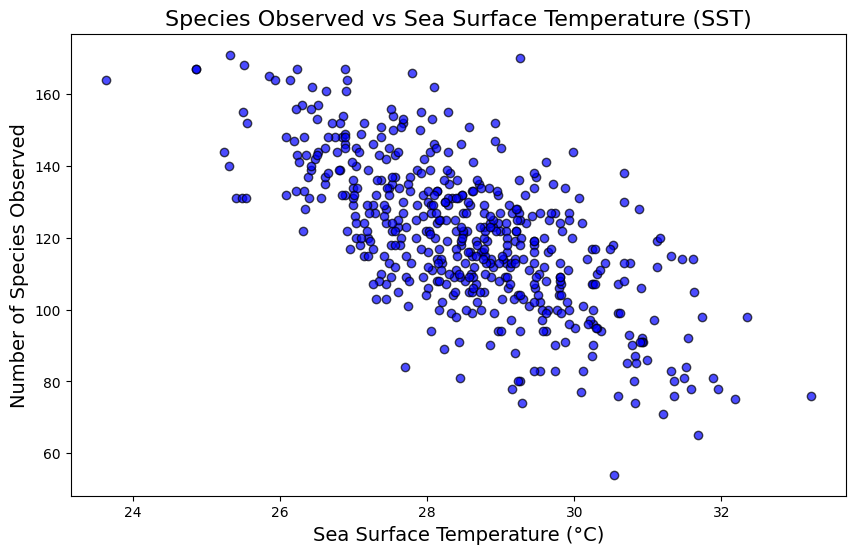

In [16]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_activity['SST (°C)'], 
    df_activity['Species Observed'], 
    color='blue', 
    alpha=0.7,
    edgecolors='k'  # black edge around dots
)

# Labels and title
plt.title('Species Observed vs Sea Surface Temperature (SST)', fontsize=16)
plt.xlabel('Sea Surface Temperature (°C)', fontsize=14)
plt.ylabel('Number of Species Observed', fontsize=14)

plt.show()

This plot helps us understand the relationship between biodiversity and ocean temperature. A high SST could stress species and reduce their numbers, as seen in coral reefs during heatwaves. If we compare an SST of 23 with a species count of 164 to an SST of 33 with a species count of 76, we can ask ourselves: do higher temperatures result in fewer species or do some species thrive in warmer waters? 

____

### Species Observed vs pH Level

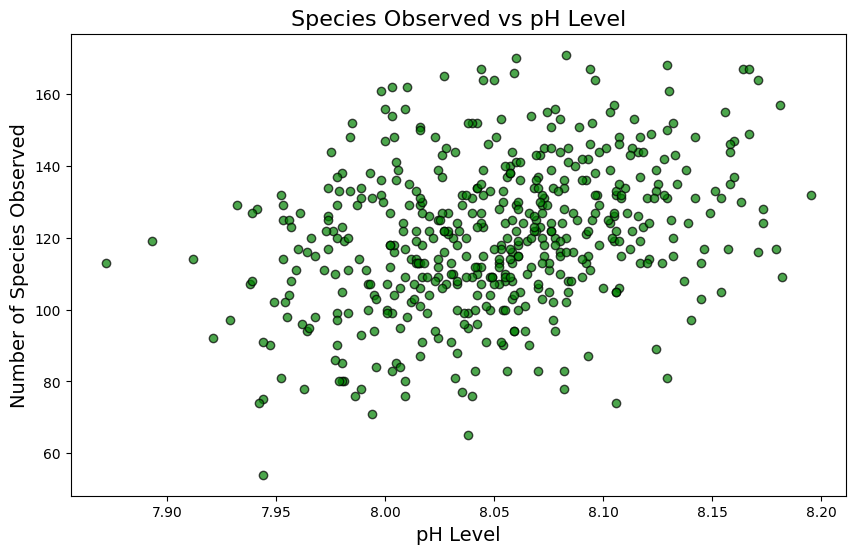

In [17]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_activity['pH Level'], 
    df_activity['Species Observed'], 
    color='green', 
    alpha=0.7,
    edgecolors='k'  # black edges around dots
)

# Labels and title
plt.title('Species Observed vs pH Level', fontsize=16)
plt.xlabel('pH Level', fontsize=14)
plt.ylabel('Number of Species Observed', fontsize=14)

plt.show()

A decrease in pH (increasing acidity) can have detrimental effects on marine organisms, particularly on those that rely on calcium for building shells and skeletons (like corals and mollusks). This plot helps visualize how changes in ocean chemistry are affecting marine biodiversity. Lower pH levels might correlate with fewer species observed due to the harmful effects of acidification.

____

### Marine Heatwaves Per Year

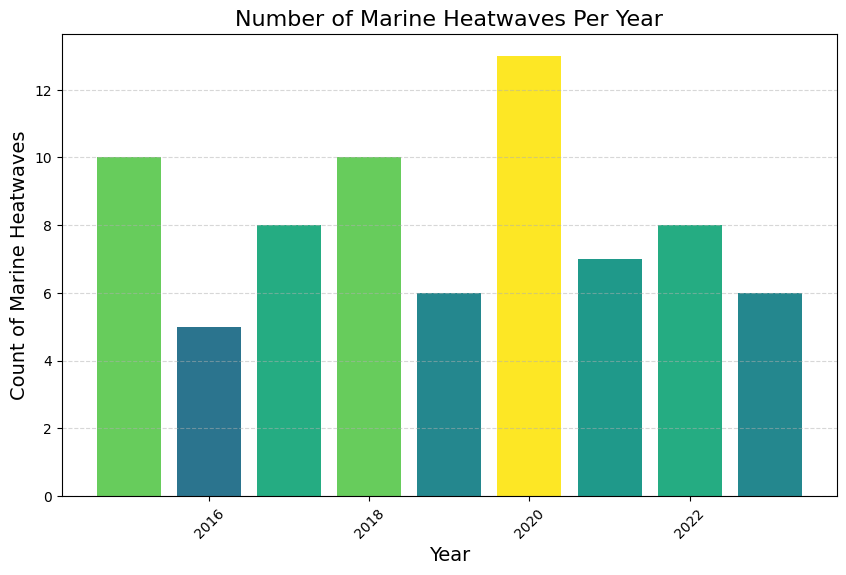

In [18]:
mhw_by_year = df_activity[df_activity['Marine Heatwave'] == True].groupby('Year').size()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(mhw_by_year.index, mhw_by_year.values, color=plt.cm.viridis(mhw_by_year.values / mhw_by_year.values.max()))

# Labels and title
plt.title('Number of Marine Heatwaves Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Marine Heatwaves', fontsize=14)
plt.xticks(rotation=45)

# Optional: grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

This plot allows us to see trends in marine heatwave, helping us to understand how often these extreme events occur and when they occured. An increase in the number of heatwaves over time is a worrying sign of global warming and its potential impact on marine life. Notably, in 2020, there were 13 recorded marine heatwaves—an increase of 8 compared to the 5 events detected in 2016

____

## Summary

1. **🌊 Coral Bleaching & Biodiversity:**
   - Low and medium coral bleaching severity correlates with higher marine species numbers.
   - High coral bleaching severity corresponds to fewer species, suggesting more severe bleaching is harmful to biodiversity.
____
2. **🌡️ Ocean Surface Temperature (SST):**
   - The moving average plot reveals rising SST over time, signaling ocean warming.
   - An increase in SST could indicate a warming climate, which may lead to more frequent and intense marine heatwaves, affecting marine ecosystems, especially corals.
____
3. **⚖️ Ocean Acidification (pH Levels):**
   - A decreasing pH level suggests increased acidity in seawater, which harms marine life, particularly calcifying organisms like corals and shellfish.
   - Monitoring pH helps assess the impact of ocean acidification on marine ecosystems.
____
4. **🔄 Correlation Between SST and pH:**
   - A moderate negative correlation (-0.515) between SST and pH indicates that higher SST often leads to lower pH (more acidic water).
   - Warmer waters could contribute to ocean acidification, which negatively affects marine organisms, especially corals.
____
5. **🐠 SST and Biodiversity Relationship:**
   - Higher SST correlates with reduced species numbers, as seen during marine heatwaves.
   - It raises questions about whether higher temperatures directly result in fewer species or if some species can thrive in warmer waters.
____
6. **🌿 Marine Acidification & Biodiversity:**
   - Lower pH levels (increased acidity) are detrimental to marine organisms, particularly those that rely on calcium for shells and skeletons.
   - This negatively affects marine biodiversity, as seen in the visualized data.
____
7. **🔥 Marine Heatwaves Trends:**
   - There’s an increase in marine heatwaves over time, with a notable rise from 5 in 2016 to 13 in 2020.
   - More frequent heatwaves indicate the growing impact of global warming on marine life.
____